In [1]:
import sys
sys.path.append('./../../designer/script/')
from gets.get_spectrum import get_spectrum_simple
from design import DesignSimple
from film import FilmSimple
from spectrum import SpectrumSimple
from utils.plot_spectrum import plot_spectrum
from utils.load_designs import init_film_single_spec
from utils.load_designs import load_designs_single_spec as load_designs
from utils.sort import sort_by_ith_list
from utils.loss import calculate_RMS
from utils.structure import plot_layer_thickness

import numpy as np
import matplotlib.pyplot as plt

# Initialize: config for TML
WLS = np.linspace(500, 1000, 500)
INC_ANG = 60.
wl = 750. # wl used for calculating OT

def plot_film(f: FilmSimple):
    spec = f.get_spec()
    spec.calculate() # compile cuda kernel func
    plot_spectrum(spec)

np.random.seed(1)
f_target_30layers = FilmSimple("SiO2", "TiO2", "SiO2", np.random.random(30) * 100) # target film for TML
f_target_30layers.add_spec_param(INC_ANG, WLS)

np.random.seed(1)
f_target_4layers = FilmSimple("SiO2", "TiO2", "SiO2", np.random.random(4) * 750) # target film for TML
f_target_4layers.add_spec_param(INC_ANG, WLS)

In [2]:
# Load trained films data and construct Design objects
runs_dict = {
            "SiO2_30layers": {},
            "TiO2_30layers": {},
            "SiO2_4layers": {},
            "TiO2_4layers": {}    
            }
runs_dict['SiO2_30layers']['file_dir'] = './../raw_design_result/50iters_0to2OT_200run_SiO2_target30layers/'
runs_dict['TiO2_30layers']['file_dir'] = './../raw_design_result/50iters_0to2OT_200run_TiO2_target30layers/'
runs_dict['SiO2_4layers']['file_dir'] = './../raw_design_result/50iters_0to2OT_200run_SiO2_target4layers/'
runs_dict['TiO2_4layers']['file_dir'] = './../raw_design_result/50iters_0to2OT_200run_TiO2_target4layers/'

runs_dict['SiO2_30layers']['save_fig_dir'] = './figs/50iters_0to2OT_200run_SiO2_target30layers/'
runs_dict['TiO2_30layers']['save_fig_dir'] = './figs/50iters_0to2OT_200run_TiO2_target30layers/'
runs_dict['SiO2_4layers']['save_fig_dir'] = './figs/50iters_0to2OT_200run_SiO2_target4layers/'
runs_dict['TiO2_4layers']['save_fig_dir'] = './figs/50iters_0to2OT_200run_TiO2_target4layers/'



runs_dict['SiO2_30layers']['designs'] = load_designs(
    runs_dict['SiO2_30layers']['file_dir'],
    f_target_30layers,
    n_A='SiO2',
    n_B='TiO2',
    n_sub='SiO2'
)
runs_dict['TiO2_30layers']['designs'] = load_designs(
    runs_dict['TiO2_30layers']['file_dir'],
    f_target_30layers,
    n_A='TiO2',
    n_B='SiO2',
    n_sub='SiO2'
)
runs_dict['SiO2_4layers']['designs'] = load_designs(
    runs_dict['SiO2_4layers']['file_dir'],
    f_target_4layers,
    n_A='SiO2',
    n_B='TiO2',
    n_sub='SiO2'
)

runs_dict['TiO2_4layers']['designs'] = load_designs(
    runs_dict['TiO2_4layers']['file_dir'], 
    f_target_4layers,
    n_A='TiO2',
    n_B='SiO2',
    n_sub='SiO2',
    load_training_process=True # load design process: takes another 1min
)


            

c:\Users\rfeng6\.conda\envs\cuda\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 32 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Trained film should not have zero geometric thickness (run 0)
Trained film should not have zero geometric thickness (run 0)
Trained film should not have zero geometric thickness (run 0)


c:\Users\rfeng6\Desktop\working\Thin-Film-Design\working\structure\./../../designer/script\utils\load_designs.py:37: UserWarning: loadtxt: input contained no data: "./../raw_design_result/50iters_0to2OT_200run_SiO2_target4layers/run_23/iter_0"
  np.loadtxt(file_dir + f'run_{run_idx}/iter_0', dtype=float)*1000.
c:\Users\rfeng6\Desktop\working\Thin-Film-Design\working\structure\./../../designer/script\utils\load_designs.py:37: UserWarning: loadtxt: input contained no data: "./../raw_design_result/50iters_0to2OT_200run_SiO2_target4layers/run_31/iter_0"
  np.loadtxt(file_dir + f'run_{run_idx}/iter_0', dtype=float)*1000.
c:\Users\rfeng6\Desktop\working\Thin-Film-Design\working\structure\./../../designer/script\utils\load_designs.py:37: UserWarning: loadtxt: input contained no data: "./../raw_design_result/50iters_0to2OT_200run_SiO2_target4layers/run_32/iter_0"
  np.loadtxt(file_dir + f'run_{run_idx}/iter_0', dtype=float)*1000.
c:\Users\rfeng6\Desktop\working\Thin-Film-Design\working\structu

Trained film should not have zero geometric thickness (run 0)


array([[2.53346275+0.j, 2.53346275+0.j, 2.53346275+0.j, ...,
        2.53346275+0.j, 2.53346275+0.j, 2.53346275+0.j],
       [2.53346275+0.j, 2.53346275+0.j, 2.53346275+0.j, ...,
        2.53346275+0.j, 2.53346275+0.j, 2.53346275+0.j],
       [2.53346275+0.j, 2.53346275+0.j, 2.53346275+0.j, ...,
        1.53938414+0.j, 1.53938414+0.j, 1.53938414+0.j],
       ...,
       [1.53938414+0.j, 1.53938414+0.j, 1.53938414+0.j, ...,
        1.53938414+0.j, 1.53938414+0.j, 1.53938414+0.j],
       [1.53938414+0.j, 1.53938414+0.j, 1.53938414+0.j, ...,
        1.53938414+0.j, 1.53938414+0.j, 1.53938414+0.j],
       [1.53938414+0.j, 1.53938414+0.j, 1.53938414+0.j, ...,
        1.53938414+0.j, 1.53938414+0.j, 1.53938414+0.j]])

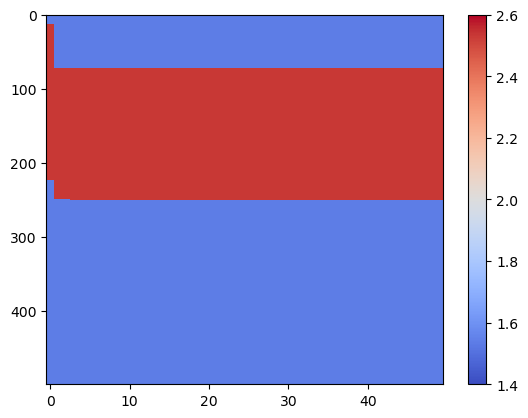

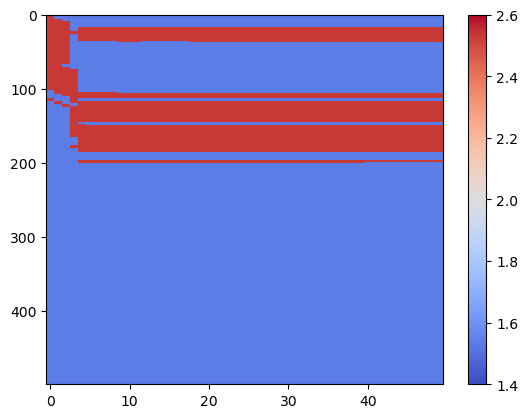

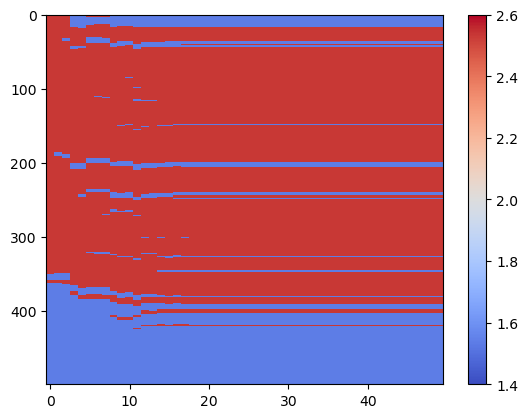

In [7]:


def show_design_process(design: DesignSimple):
    spec = design.film.get_spec()
    n_A = spec.n[spec.WLS.shape[0] // 2, 0]
    n_B = spec.n[spec.WLS.shape[0] // 2, 1]
    n_sub = spec.n_sub[spec.WLS.shape[0] // 2]
    n_arr = [n_A, n_B]

    resolution = 500
    arr = np.zeros((resolution, len(design.training_films)), dtype='complex128') + n_sub
    l_per_pix = design.get_target_gt() * 2 / arr.shape[0]

    iter = 0
    for film in design.training_films:
        layer_idx = 0
        d = film.get_d()

        for pix in range(arr.shape[0]):
            for i in range(d.shape[0]):
                if d[:i + 1].sum() > pix * l_per_pix:
                    arr[pix, iter] = n_arr[i % 2]
                    break
        iter += 1
    
    fig, ax = plt.subplots(1, 1)
    s = ax.imshow(arr.real, aspect='auto', cmap='coolwarm', interpolation='none', vmin=1.4, vmax=2.6)
    fig.colorbar(s)     
    return arr

show_design_process(runs_dict['TiO2_4layers']['designs'][92]) # 90 to 93, target structure

# stable
show_design_process(runs_dict['TiO2_4layers']['designs'][50])
show_design_process(runs_dict['TiO2_4layers']['designs'][150])

# # unstable: BUG
# show_design_process(runs_dict['TiO2_4layers']['designs'][95])
# show_design_process(runs_dict['TiO2_4layers']['designs'][96])
# show_design_process(runs_dict['TiO2_4layers']['designs'][97])
# show_design_process(runs_dict['TiO2_4layers']['designs'][98])

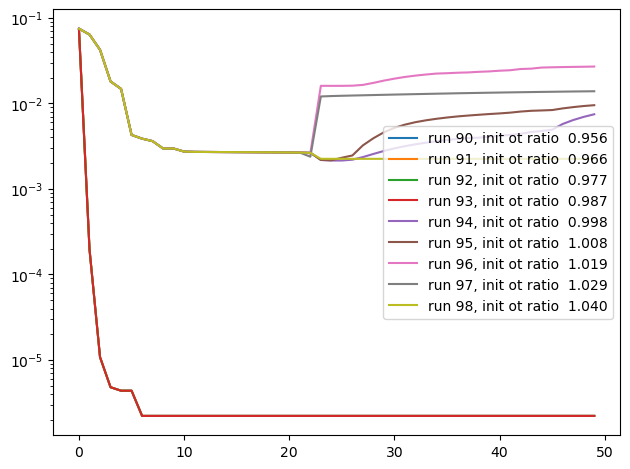

In [109]:
# BUG: the gd should have guaranteed a strict decrease of loss
fig, ax = plt.subplots(1, 1)
for run_idx in range(90, 99):
    loss = []
    design: DesignSimple = runs_dict['TiO2_4layers']['designs'][run_idx]
    for film in design.training_films:
        loss.append(calculate_RMS(design.target_film, film))

    ax.plot(loss, label=f'run {run_idx}, init ot ratio {design.get_init_ot().real / design.get_target_ot().real: .3f}')
# ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.legend()
ax.set_yscale('log')
fig.tight_layout()


[3.12766504e+02 5.40243370e+02 8.57811130e-02 2.26749429e+02]


c:\Users\rfeng6\.conda\envs\cuda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\rfeng6\AppData\Local\Temp\ipykernel_8\2090551337.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1)


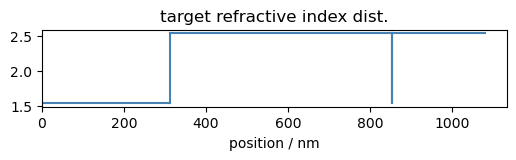

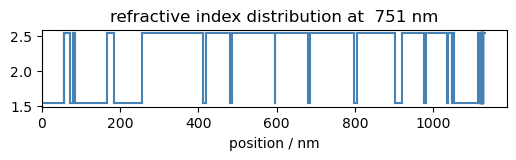

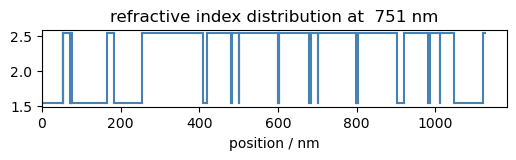

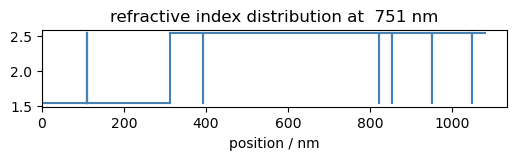

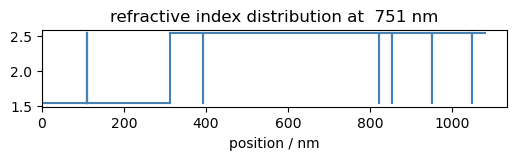

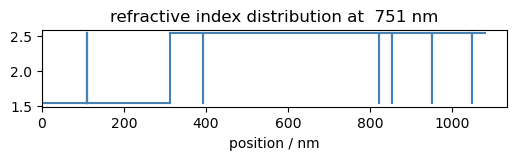

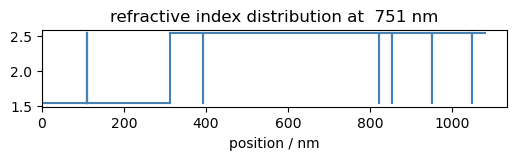

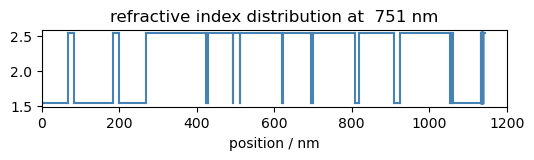

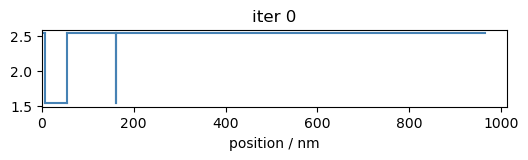

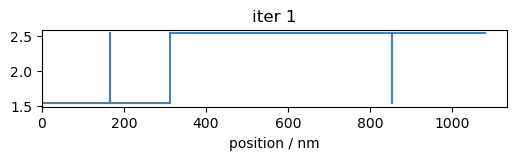

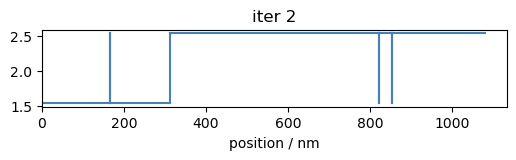

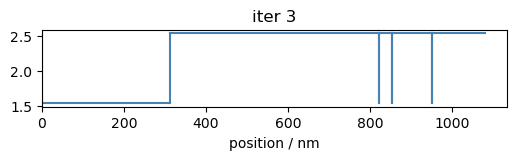

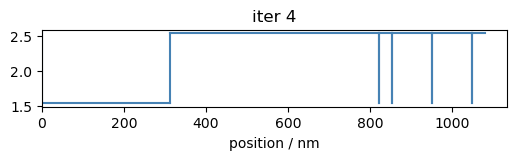

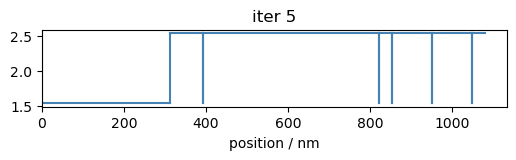

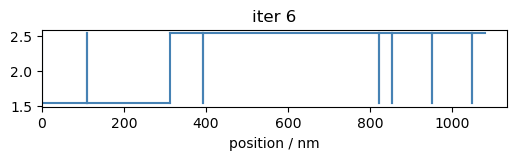

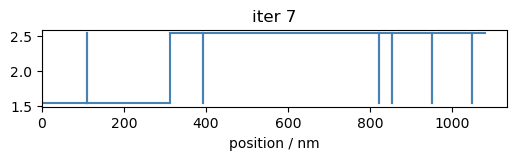

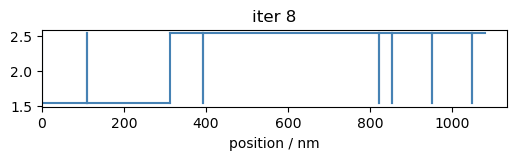

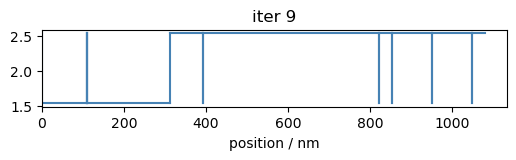

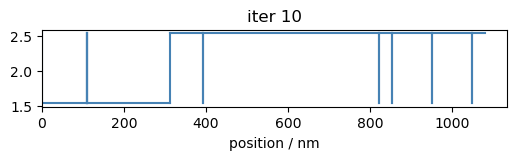

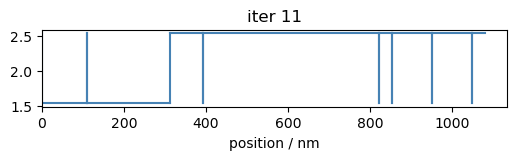

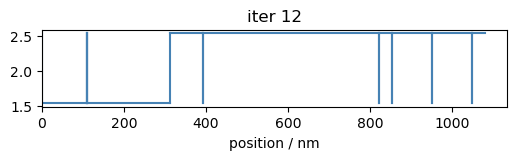

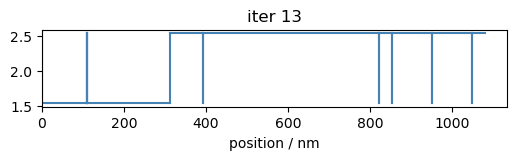

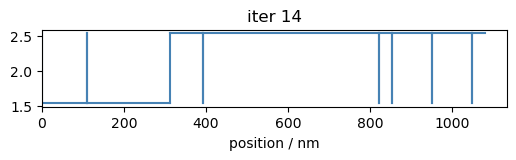

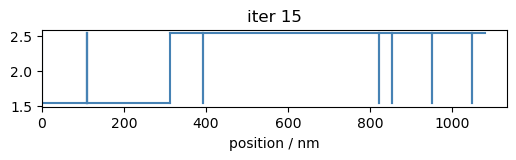

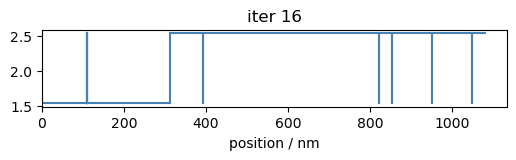

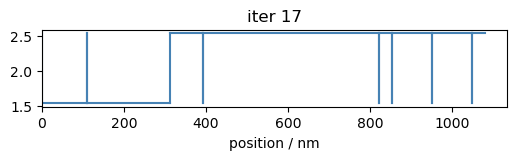

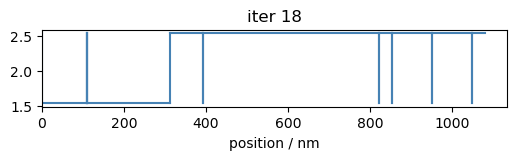

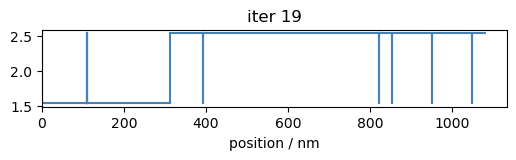

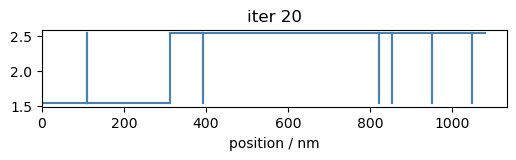

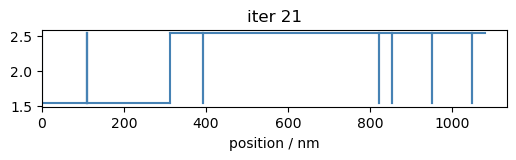

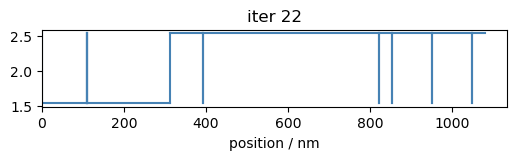

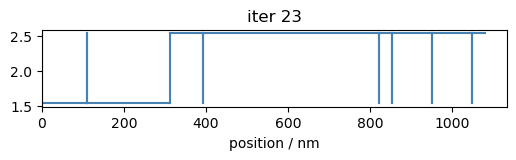

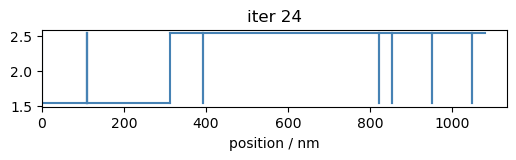

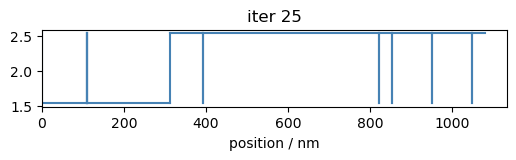

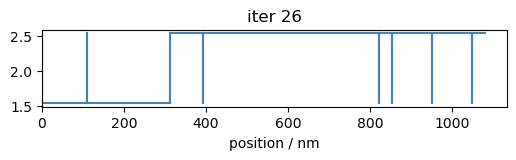

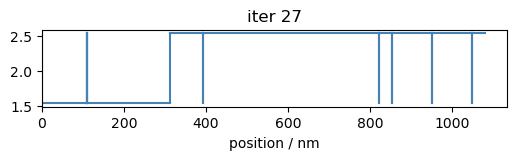

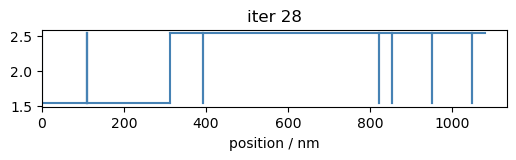

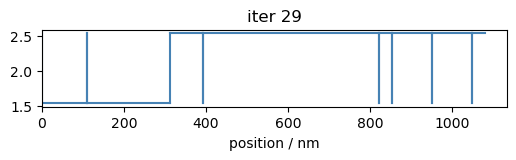

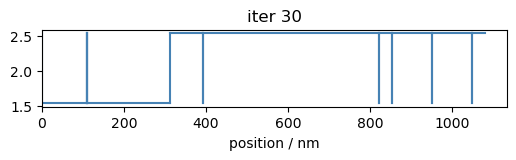

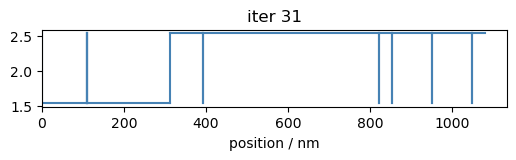

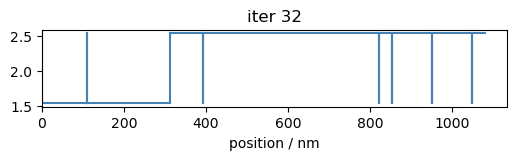

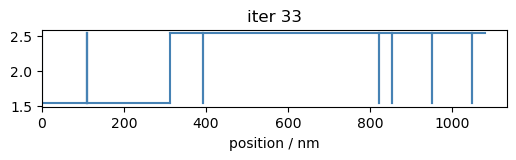

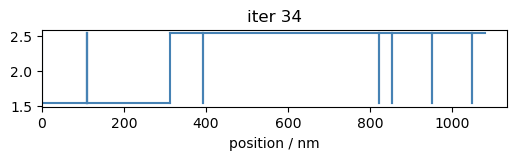

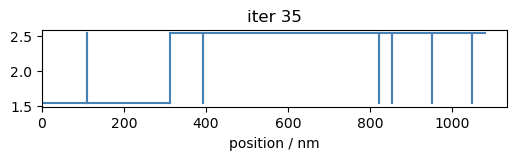

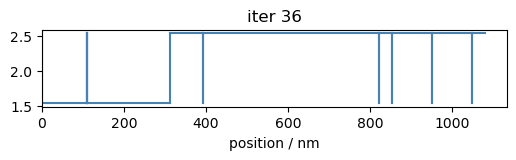

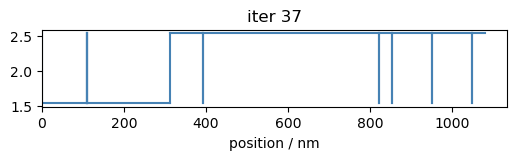

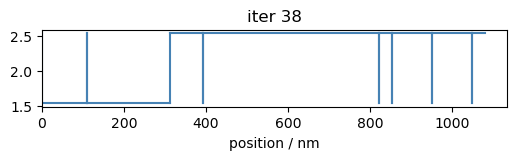

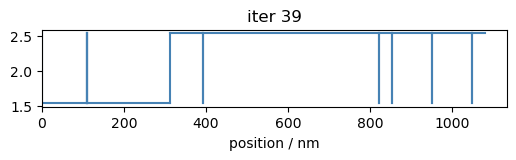

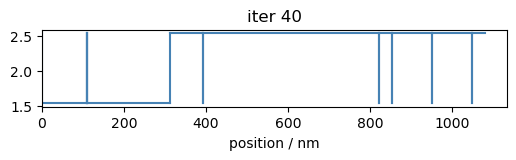

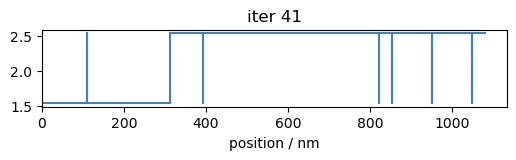

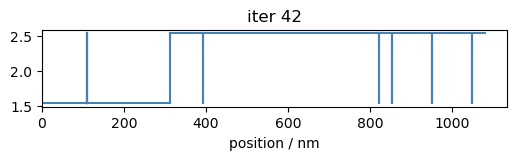

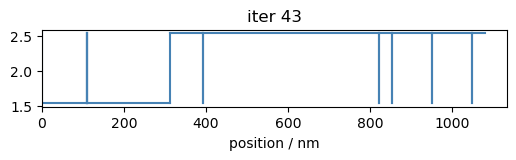

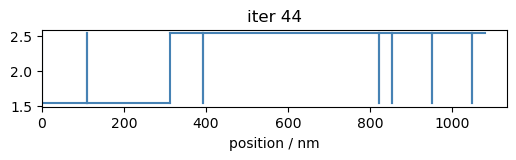

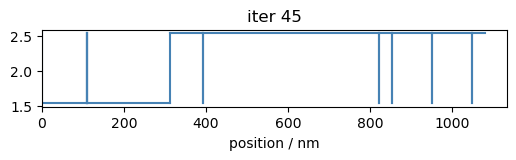

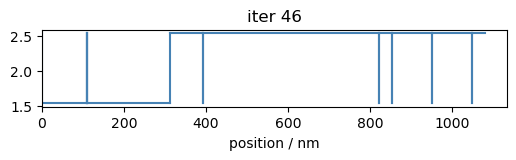

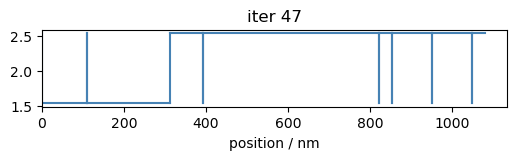

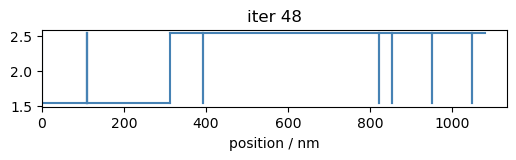

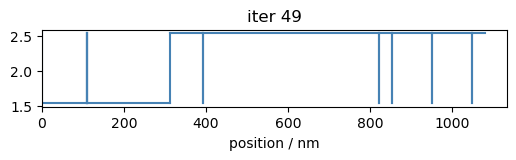

In [76]:
# 4 layers, same strcuture with the target!!!
def generate_target_f():
    WLS = np.linspace(500, 1000, 500)
    INC_ANG = 60.
    layer_number = 4
    np.random.seed(1)
    d = np.random.random(layer_number) * 3000 / layer_number
    print(d)
    f = FilmSimple('SiO2', 'TiO2', 'SiO2', d)
    f.add_spec_param(INC_ANG, WLS)
    f.calculate_spectrum()
    spec = f.get_spec().get_R()
    return f

ax, fig = plot_layer_thickness(generate_target_f())
ax.set_title('target refractive index dist.')

for i in range(87, 94):
    plot_layer_thickness(runs_dict['TiO2_4layers']['designs'][i].film)

# design process of the 92-th run
iter = 0
for film in runs_dict['TiO2_4layers']['designs'][92].training_films:
    ax, fig = plot_layer_thickness(film)
    ax.set_title(f'iter {iter}')
    iter += 1